# About Dataset
Introduction
This is a csv file containing related information of 5172 randomly picked email files and their respective labels for spam or not-spam classification.

## About the Dataset
The csv file contains 5172 rows, each row for each email. There are 3002 columns. The first column indicates Email name. The name has been set with numbers and not recipients' name to protect privacy. The last column has the labels for prediction : 1 for spam, 0 for not spam. The remaining 3000 columns are the 3000 most common words in all the emails, after excluding the non-alphabetical characters/words. For each row, the count of each word(column) in that email(row) is stored in the respective cells. Thus, information regarding all 5172 emails are stored in a compact dataframe rather than as separate text files.

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data=pd.read_csv('emails.csv')

In [5]:
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [6]:
#there is no null value...

In [7]:
(data.isnull().sum()==1).value_counts()

False    3002
dtype: int64

In [8]:
data=data.drop('Email No.',axis=1)

In [9]:
y=data['Prediction']
x=data.drop('Prediction',axis=1)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc=StandardScaler()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [14]:
X_train=sc.fit_transform(X_train)

In [15]:
X_test=sc.transform(X_test)

In [16]:
model=Sequential([
    Dense(20,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    Dense(5,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    Dense(1,activation='sigmoid'),
])

In [17]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

In [18]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/200
14/14 [==============================] - 2s 50ms/step - loss: 4.3027 - val_loss: 2.9958
Epoch 2/200
14/14 [==============================] - 0s 13ms/step - loss: 2.3701 - val_loss: 1.8222
Epoch 3/200
14/14 [==============================] - 0s 13ms/step - loss: 1.5964 - val_loss: 1.4162
Epoch 4/200
14/14 [==============================] - 0s 13ms/step - loss: 1.3407 - val_loss: 1.2804
Epoch 5/200
14/14 [==============================] - 0s 13ms/step - loss: 1.2401 - val_loss: 1.2053
Epoch 6/200
14/14 [==============================] - 0s 12ms/step - loss: 1.1726 - val_loss: 1.1436
Epoch 7/200
14/14 [==============================] - 0s 13ms/step - loss: 1.1133 - val_loss: 1.0852
Epoch 8/200
14/14 [==============================] - 0s 13ms/step - loss: 1.0574 - val_loss: 1.0325
Epoch 9/200
14/14 [==============================] - 0s 14ms/step - loss: 1.0075 - val_loss: 0.9840
Epoch 10/200
14/14 [==============================] - 0s 13ms/step - loss: 0.9605 - val_loss: 0.9374

14/14 [==============================] - 0s 11ms/step - loss: 0.2657 - val_loss: 0.2804
Epoch 83/200
14/14 [==============================] - 0s 10ms/step - loss: 0.2653 - val_loss: 0.2764
Epoch 84/200
14/14 [==============================] - 0s 11ms/step - loss: 0.2650 - val_loss: 0.2794
Epoch 85/200
14/14 [==============================] - 0s 10ms/step - loss: 0.2622 - val_loss: 0.2766
Epoch 86/200
14/14 [==============================] - 0s 11ms/step - loss: 0.2606 - val_loss: 0.2767
Epoch 87/200
14/14 [==============================] - 0s 10ms/step - loss: 0.2583 - val_loss: 0.2724
Epoch 88/200
14/14 [==============================] - 0s 10ms/step - loss: 0.2593 - val_loss: 0.2734
Epoch 89/200
14/14 [==============================] - 0s 10ms/step - loss: 0.2592 - val_loss: 0.2734
Epoch 90/200
14/14 [==============================] - 0s 10ms/step - loss: 0.2559 - val_loss: 0.2740
Epoch 91/200
14/14 [==============================] - 0s 11ms/step - loss: 0.2570 - val_loss: 0.2750
Epo

14/14 [==============================] - 0s 13ms/step - loss: 0.2091 - val_loss: 0.2274
Epoch 163/200
14/14 [==============================] - 0s 11ms/step - loss: 0.2038 - val_loss: 0.2307
Epoch 164/200
14/14 [==============================] - 0s 11ms/step - loss: 0.2097 - val_loss: 0.2532
Epoch 165/200
14/14 [==============================] - 0s 12ms/step - loss: 0.2230 - val_loss: 0.2460
Epoch 166/200
14/14 [==============================] - 0s 12ms/step - loss: 0.2105 - val_loss: 0.2330
Epoch 167/200
14/14 [==============================] - 0s 12ms/step - loss: 0.2114 - val_loss: 0.2351
Epoch 168/200
14/14 [==============================] - 0s 11ms/step - loss: 0.2057 - val_loss: 0.2247
Epoch 169/200
14/14 [==============================] - 0s 10ms/step - loss: 0.2035 - val_loss: 0.2256
Epoch 170/200
14/14 [==============================] - 0s 10ms/step - loss: 0.2063 - val_loss: 0.2394
Epoch 171/200
14/14 [==============================] - 0s 11ms/step - loss: 0.2140 - val_loss: 0

In [19]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

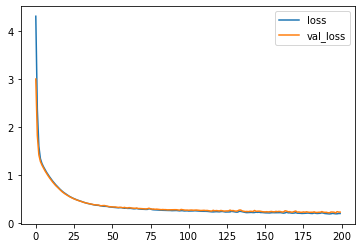

In [20]:
losses[['loss','val_loss']].plot()

In [21]:
predictions = model.predict(X_test)

54/54 [==============================] - 0s 2ms/step


In [22]:
predictions=[int((x>0.5)) for x in predictions]

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
#accuracy 98%

In [25]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1215
           1       0.95      0.97      0.96       492

    accuracy                           0.98      1707
   macro avg       0.97      0.97      0.97      1707
weighted avg       0.98      0.98      0.98      1707



In [26]:
confusion_matrix(y_test,predictions)

array([[1192,   23],
       [  16,  476]], dtype=int64)